<a href="https://colab.research.google.com/github/lilchengzi/BA820-project/blob/main/Yuna_Kmeans_part_BA820_Team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing libraries and loading the dataset

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/yasserh/instacart-online-grocery-basket-analysis-dataset")

Skipping, found downloaded files in "./instacart-online-grocery-basket-analysis-dataset" (use force=True to force download)


In [ ]:
#importing necessary libraries

import pandas as pd
import numpy as np

In [ ]:
# loading all dataframes

aisles = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/aisles.csv')
dept = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/departments.csv')
orders_prior = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/order_products__prior.csv')
orders = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/orders.csv')
prod = pd.read_csv('/content/instacart-online-grocery-basket-analysis-dataset/products.csv')

In [ ]:
#aisles = pd.read_csv('/content/aisles.csv')
#dept = pd.read_csv('/content/departments.csv')
#orders_prior = pd.read_csv('/content/order_products__prior.csv')
#orders = pd.read_csv('/content/orders.csv')
#prod = pd.read_csv('/content/products.csv')

In [ ]:
orders_prior = orders_prior.sample(frac=0.01, random_state=42)

In [ ]:
orders_prior

,order_id,product_id,add_to_cart_order,reordered
29481110,3109255,34099,16,0
2852353,301098,41950,5,0
11194500,1181866,45066,8,0
15909397,1678630,8859,2,1
6101870,644090,24781,2,0
...,...,...,...,...
13579781,1433375,34969,5,1
22168330,2338221,10248,10,0
4041427,426460,27676,7,0
4328233,456879,38028,2,1


In [ ]:
print(orders_prior)

          order_id  product_id  add_to_cart_order  reordered
29481110   3109255       34099                 16          0
2852353     301098       41950                  5          0
11194500   1181866       45066                  8          0
15909397   1678630        8859                  2          1
6101870     644090       24781                  2          0
...            ...         ...                ...        ...
13579781   1433375       34969                  5          1
22168330   2338221       10248                 10          0
4041427     426460       27676                  7          0
4328233     456879       38028                  2          1
31706271   3344107       40706                  4          1

[324345 rows x 4 columns]


In [ ]:
# joining them together on common keys

df1 = pd.merge(prod, aisles, how='inner', on='aisle_id')
df2 = df1.merge(dept, how='inner', on='department_id')
df3 = df2.merge(orders_prior, how='inner', on='product_id')
df4 = df3.merge(orders, how='inner', on='order_id')

#simplifying pnenomics and displaying the dataframe
df = df4.copy()
df.head()

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,924888,11,1,177411,prior,72,5,1,4.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,268506,13,1,157915,prior,20,1,9,20.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,2109664,4,0,145504,prior,3,2,14,1.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3209740,2,1,7981,prior,24,2,13,6.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1550174,1,1,66968,prior,15,3,16,15.0


##Exploring the dataset

In [ ]:
df.eval_set.unique()

array(['prior'], dtype=object)

In [ ]:
df = df.drop('eval_set', axis=1)

Dropping the eval_set column since it holds no relevance and is merely a label for orders with only one label present.

In [ ]:
df.isna().sum()

product_id                    0
product_name                  0
aisle_id                      0
department_id                 0
aisle                         0
department                    0
order_id                      0
add_to_cart_order             0
reordered                     0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    20775
dtype: int64

The data contains no null values for any of the columns so we need not drop any rows.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324345 entries, 0 to 324344
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   product_id              324345 non-null  int64  
 1   product_name            324345 non-null  object 
 2   aisle_id                324345 non-null  int64  
 3   department_id           324345 non-null  int64  
 4   aisle                   324345 non-null  object 
 5   department              324345 non-null  object 
 6   order_id                324345 non-null  int64  
 7   add_to_cart_order       324345 non-null  int64  
 8   reordered               324345 non-null  int64  
 9   user_id                 324345 non-null  int64  
 10  order_number            324345 non-null  int64  
 11  order_dow               324345 non-null  int64  
 12  order_hour_of_day       324345 non-null  int64  
 13  days_since_prior_order  303570 non-null  float64
dtypes: float64(1), int64

The data types seem relevant to their respective columns.

In [ ]:
df.describe()

,product_id,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,324345.000000,324345.000000,324345.000000,3.243450e+05,324345.000000,324345.000000,324345.000000,324345.000000,324345.000000,324345.000000,303570.000000
mean,25551.139194,71.198033,9.938035,1.710520e+06,8.376010,0.589536,102951.981295,17.144796,2.733216,13.428571,11.093603
std,14110.454313,38.222234,6.276621,9.869484e+05,7.158359,0.491919,59441.408028,17.502843,2.090947,4.251041,8.769043
min,1.000000,1.000000,1.000000,4.300000e+01,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,13431.000000,31.000000,4.000000,8.559500e+05,3.000000,0.000000,51566.000000,5.000000,1.000000,10.000000,5.000000
50%,25167.000000,83.000000,9.000000,1.709853e+06,6.000000,1.000000,102527.000000,11.000000,3.000000,13.000000,8.000000
75%,37892.000000,107.000000,16.000000,2.561704e+06,11.000000,1.000000,154508.000000,24.000000,5.000000,16.000000,15.000000
max,49688.000000,134.000000,21.000000,3.421081e+06,110.000000,1.000000,206208.000000,99.000000,6.000000,23.000000,30.000000


In [ ]:
df.describe(include='object')

,product_name,aisle,department
count,324345,324345,324345
unique,25415,134,21
top,Banana,fresh fruits,produce
freq,4754,36393,94761


Having a look at the summary statistics gives us a clearer picture of the dataset to perform further analysis.

In [ ]:
df

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,924888,11,1,177411,72,5,1,4.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,268506,13,1,157915,20,1,9,20.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,2109664,4,0,145504,3,2,14,1.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3209740,2,1,7981,24,2,13,6.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1550174,1,1,66968,15,3,16,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324340,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,1954609,7,0,130601,14,5,13,9.0
324341,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2323735,1,1,90235,30,3,10,1.0
324342,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,878186,7,1,130467,2,4,17,5.0
324343,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,2748395,1,0,96923,4,4,10,2.0


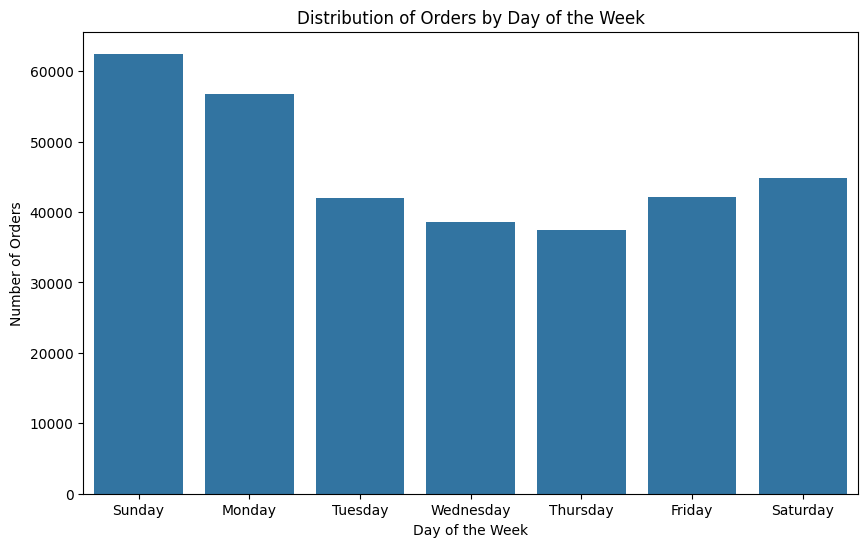

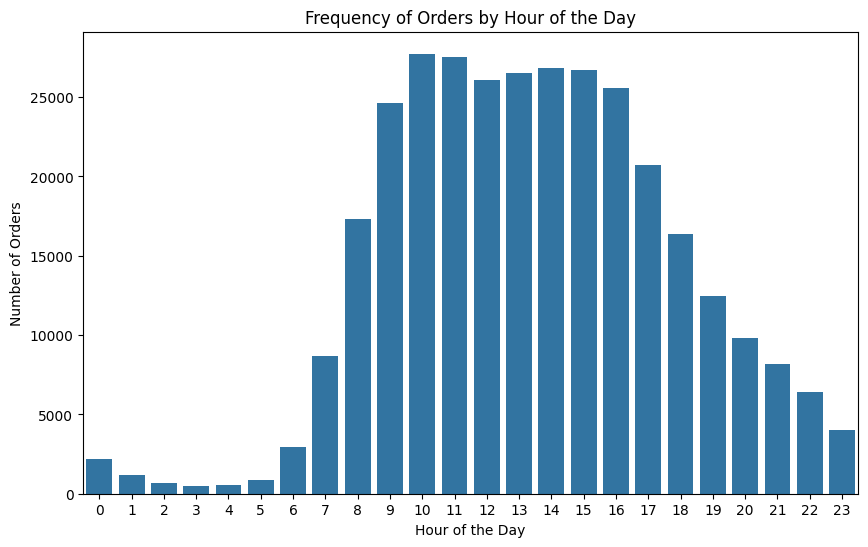

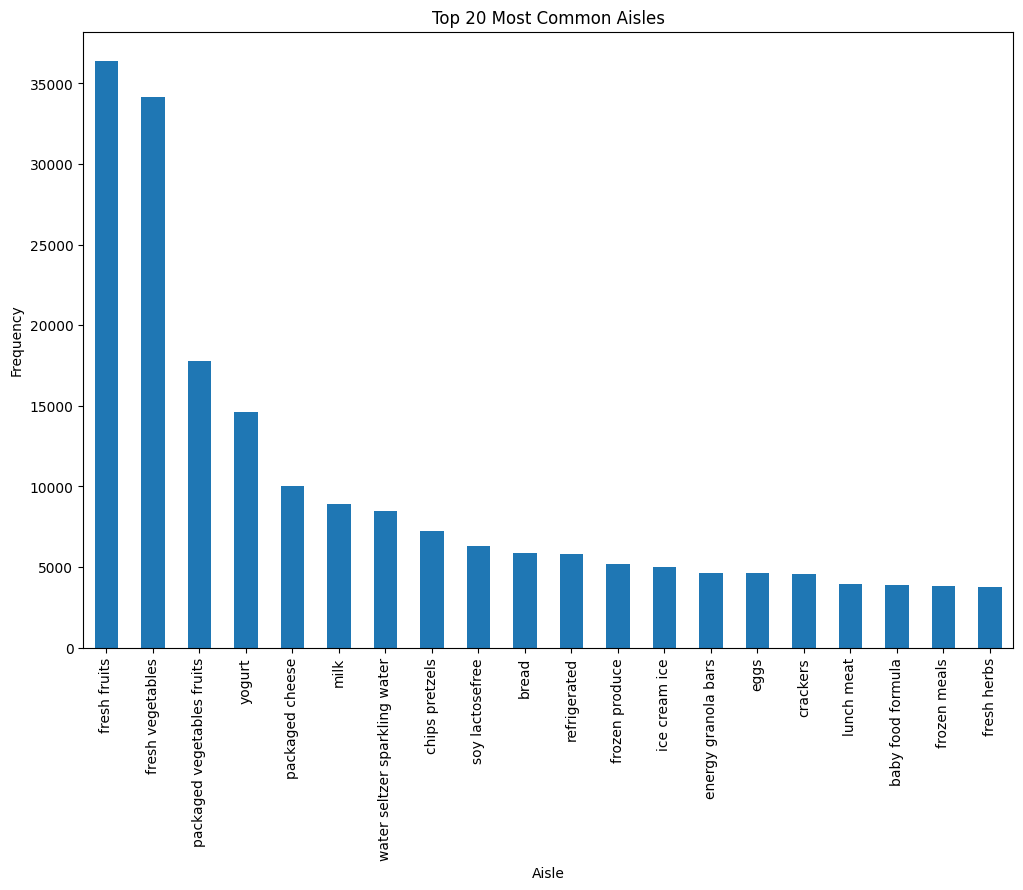

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#1: Distribution of orders by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='order_dow')
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(0, 7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

#2: Frequency of orders by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='order_hour_of_day')
plt.title('Frequency of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

#3: Top 20 most common aisles
top_aisles = df4['aisle'].value_counts().head(20)
plt.figure(figsize=(12, 8))
top_aisles.plot(kind='bar')
plt.title('Top 20 Most Common Aisles')
plt.xlabel('Aisle')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


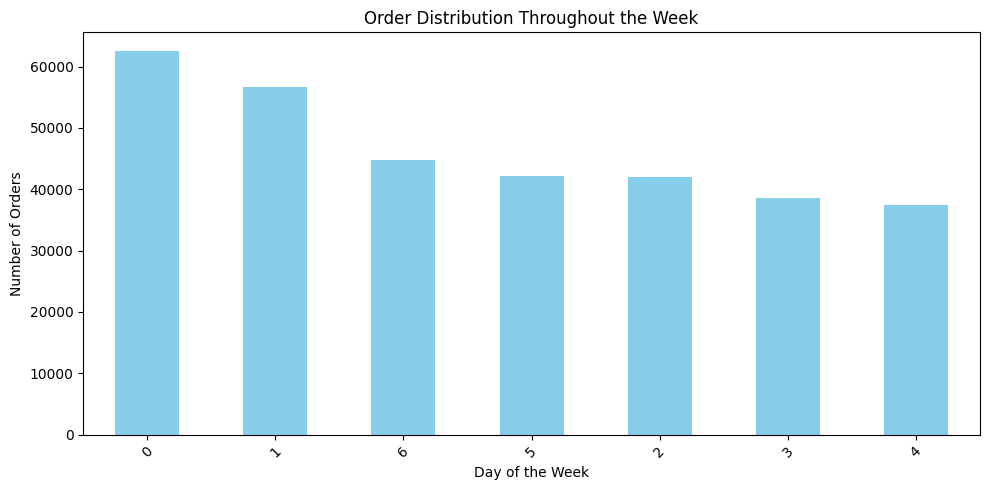

In [ ]:
order_counts = df['order_dow'].value_counts()
#Plot distribution of orders throughout the week
plt.figure(figsize=(10, 5))
order_counts.plot(kind='bar', color='skyblue')
plt.title('Order Distribution Throughout the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

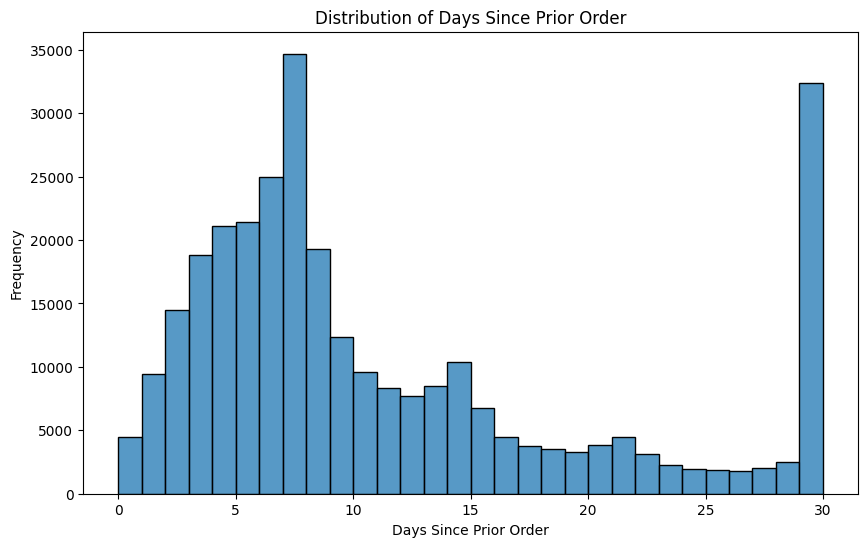

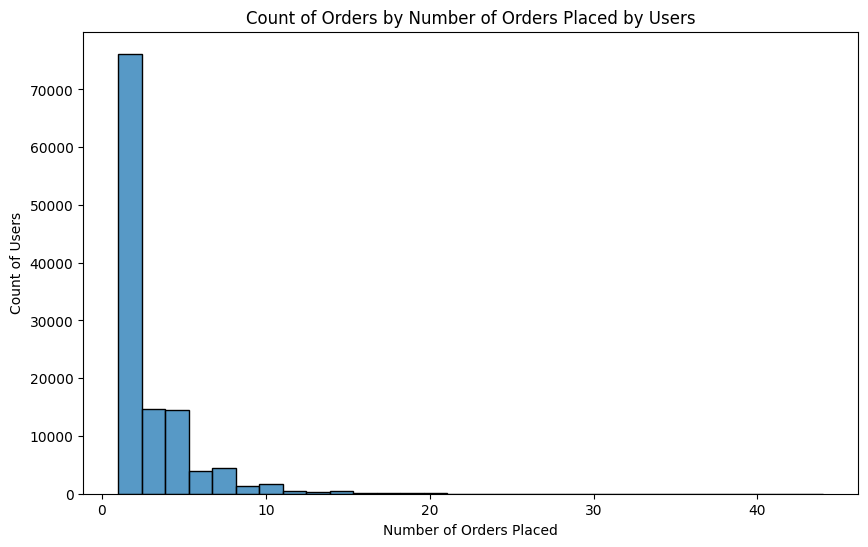

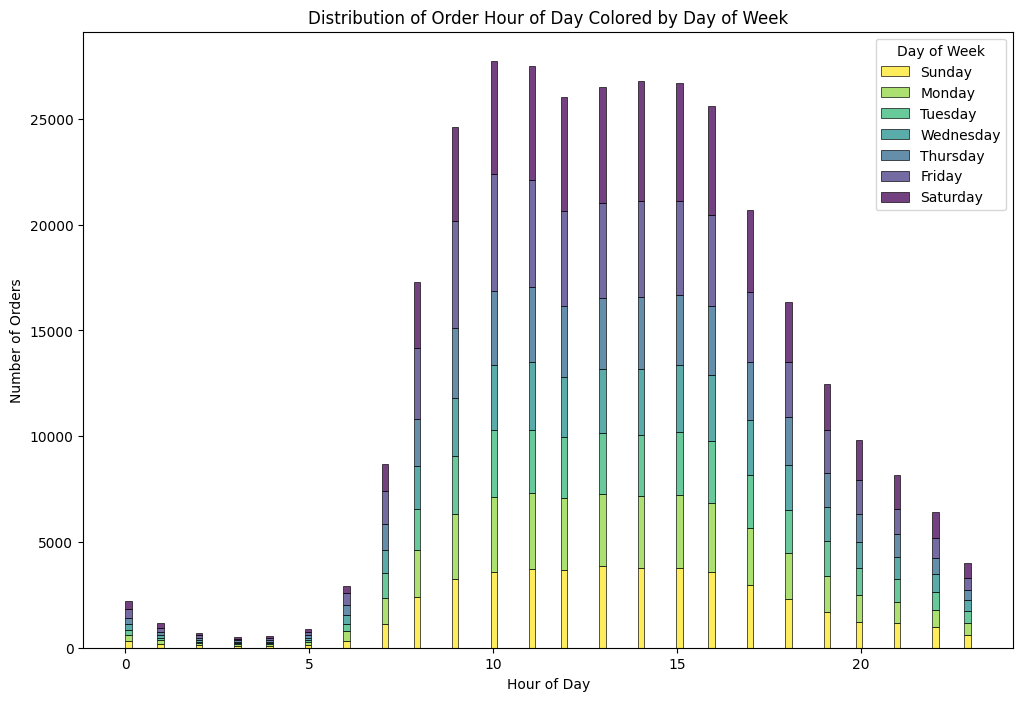

<ipython-input-20-30796f58235e>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='order_dow', y='order_hour_of_day', palette='coolwarm')


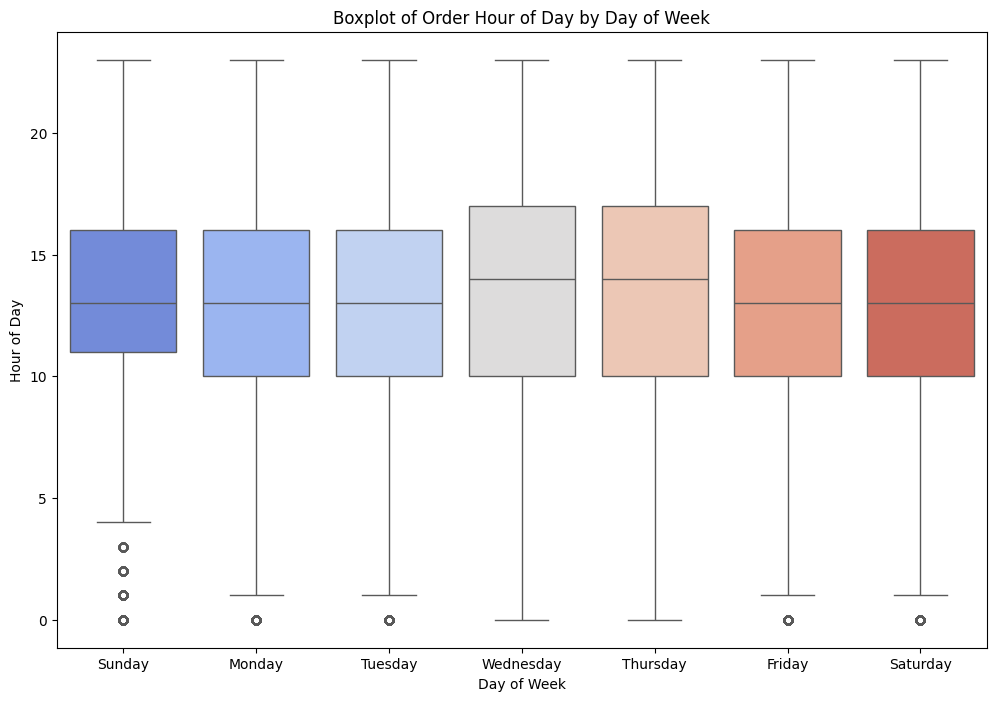

In [ ]:
#4: Distribution of days since prior order
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='days_since_prior_order', bins=30, kde=False)
plt.title('Distribution of Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')
plt.show()

#5: Count of orders by the number of orders placed by users
order_counts = df['user_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(order_counts, bins=30, kde=False)
plt.title('Count of Orders by Number of Orders Placed by Users')
plt.xlabel('Number of Orders Placed')
plt.ylabel('Count of Users')
plt.show()

#6: Distribution of order_hour_of_day colored by order_dow
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='order_hour_of_day', hue='order_dow', multiple='stack', palette='viridis')
plt.title('Distribution of Order Hour of Day Colored by Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend(title='Day of Week', labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

#7: Boxplot of order_hour_of_day by order_dow
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='order_dow', y='order_hour_of_day', palette='coolwarm')
plt.title('Boxplot of Order Hour of Day by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(ticks=range(0, 7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()


# EDA

Performing various exploratory data analyses to get to know the data better.

In [ ]:
# number of unique products in each aisle

df.groupby('aisle').product_id.nunique()

aisle
air fresheners candles           113
asian foods                      320
baby accessories                  12
baby bath body care               50
baby food formula                441
                                ... 
trash bags liners                 65
vitamins supplements             244
water seltzer sparkling water    239
white wines                       63
yogurt                           741
Name: product_id, Length: 134, dtype: int64

In [ ]:
# number of unique products in each departments

df.groupby('department').product_id.nunique()

department
alcohol             398
babies              586
bakery              973
beverages          2425
breakfast           682
bulk                 28
canned goods       1158
dairy eggs         2377
deli                809
dry goods pasta    1030
frozen             2413
household          1398
international       538
meat seafood        539
missing             252
other               166
pantry             2570
personal care      1984
pets                406
produce            1227
snacks             3456
Name: product_id, dtype: int64

In [ ]:
# order id with the biggest order

max_order = df.add_to_cart_order.max()
df[df.add_to_cart_order==max_order].loc[:,['order_id', 'user_id']]

,order_id,user_id
29349,3308010,129928


In [ ]:
# top customers based on purchase quantity

top_cust = df.groupby('user_id').order_id.count().reset_index()
top_cust.sort_values('order_id', ascending = False).head(10)

,user_id,order_id
115796,201268,44
79220,137629,43
80839,140440,37
62530,108187,37
104955,182401,36
41684,72136,35
19369,33731,33
101577,176478,32
94457,164055,32
58010,100330,31


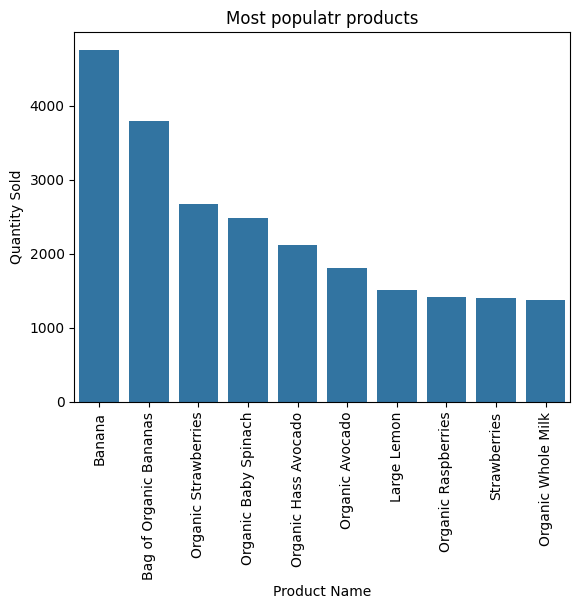

In [ ]:
# most popular products based on purchases

top_prod = df.product_name.value_counts().reset_index()
top_prod = top_prod.sort_values('product_name', ascending = False).head(10)

sns.barplot(data=top_prod, x='index', y='product_name')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.title('Most populatr products')
plt.xticks(rotation=90)
plt.show()

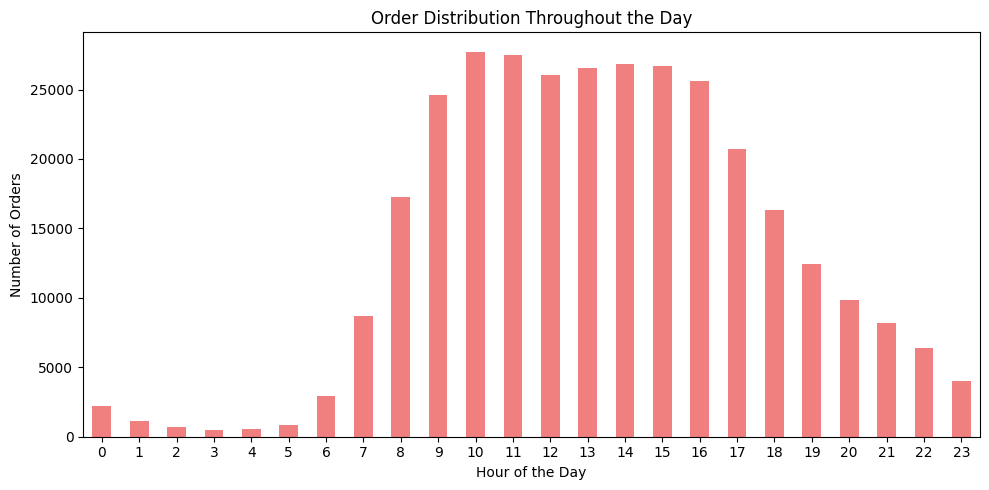

In [ ]:

# Plot distribution of orders throughout the day
plt.figure(figsize=(10, 5))
df['order_hour_of_day'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Order Distribution Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

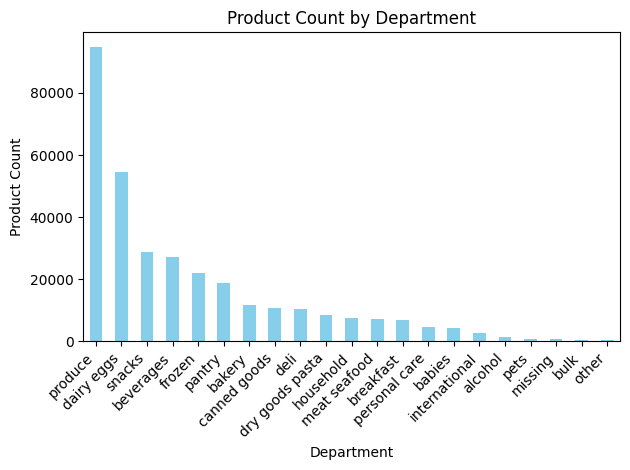

In [ ]:
# Calculate the distribution of products across departments
department_distribution = df['department'].value_counts().reset_index()
department_distribution.columns = ['department', 'product_count']
# Plot the distribution of products across departments
plt.figure(figsize=(10, 6))
department_distribution.plot(x='department', y='product_count', kind='bar', legend=False, color='skyblue')
plt.title('Product Count by Department')
plt.ylabel('Product Count')
plt.xlabel('Department')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

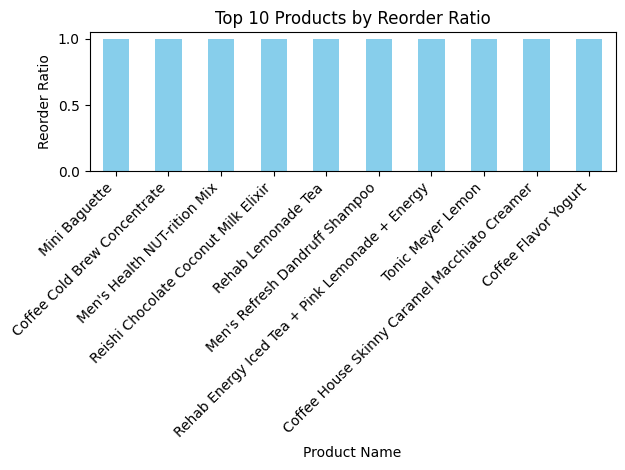

In [ ]:

# Merge the order_products_train with products to get product names
merged_df = pd.merge(orders_prior, prod, on='product_id', how='left')

# Calculate the reorder ratio for each product
reorder_ratio_df = merged_df.groupby('product_name')['reordered'].mean().reset_index()
reorder_ratio_df = reorder_ratio_df.rename(columns={'reordered': 'reorder_ratio'})

# Sort products by the highest reorder ratio
top_reorder_ratio_df = reorder_ratio_df.sort_values(by='reorder_ratio', ascending=False).head(10)

# Plot the top 10 products with the highest reorder ratio
plt.figure(figsize=(10, 6))
top_reorder_ratio_df.plot(x='product_name', y='reorder_ratio', kind='bar', legend=False, color='skyblue')
plt.title('Top 10 Products by Reorder Ratio')
plt.ylabel('Reorder Ratio')
plt.xlabel('Product Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

0            Friday
1            Monday
2           Tuesday
3           Tuesday
4         Wednesday
            ...    
324340       Friday
324341    Wednesday
324342     Thursday
324343     Thursday
324344       Sunday
Name: order_dow, Length: 324345, dtype: object


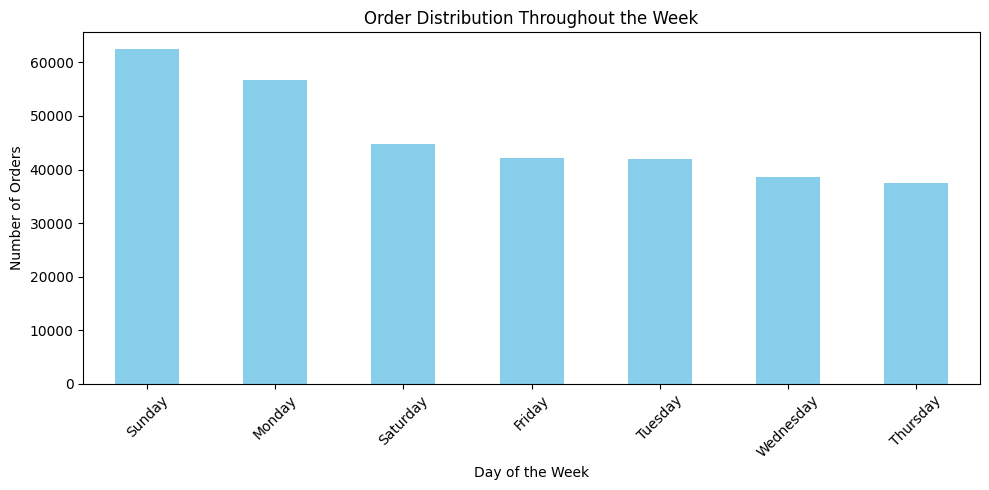

In [ ]:

order_counts = df['order_dow'].value_counts()
print(df['order_dow'])
# Plot distribution of orders throughout the week
plt.figure(figsize=(10, 5))
order_counts.plot(kind='bar', color='skyblue')
plt.title('Order Distribution Throughout the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Further Analysis

# Kmeans

In [ ]:
df.head()

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,924888,11,1,177411,72,5,1,4.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,268506,13,1,157915,20,1,9,20.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,2109664,4,0,145504,3,2,14,1.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,3209740,2,1,7981,24,2,13,6.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1550174,1,1,66968,15,3,16,15.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324345 entries, 0 to 324344
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   product_id              324345 non-null  int64  
 1   product_name            324345 non-null  object 
 2   aisle_id                324345 non-null  int64  
 3   department_id           324345 non-null  int64  
 4   aisle                   324345 non-null  object 
 5   department              324345 non-null  object 
 6   order_id                324345 non-null  int64  
 7   add_to_cart_order       324345 non-null  int64  
 8   reordered               324345 non-null  int64  
 9   user_id                 324345 non-null  int64  
 10  order_number            324345 non-null  int64  
 11  order_dow               324345 non-null  int64  
 12  order_hour_of_day       324345 non-null  int64  
 13  days_since_prior_order  303570 non-null  float64
dtypes: float64(1), int64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num = df[['add_to_cart_order', 'reordered', 'order_number', 'order_dow']]
X_fit = scaler.fit_transform(X_num)

In [ ]:
X_cat = df[['product_name', 'reordered', 'order_number', 'order_dow']]
X = np.hstack((X_num))
X

array(['add_to_cart_order', 'reordered', 'order_number', 'order_dow'],
      dtype='<U17')

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_features = ['add_to_cart_order', 'reordered', 'order_number', 'order_dow']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['product_name']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

X_processed = preprocessor.fit_transform(df)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


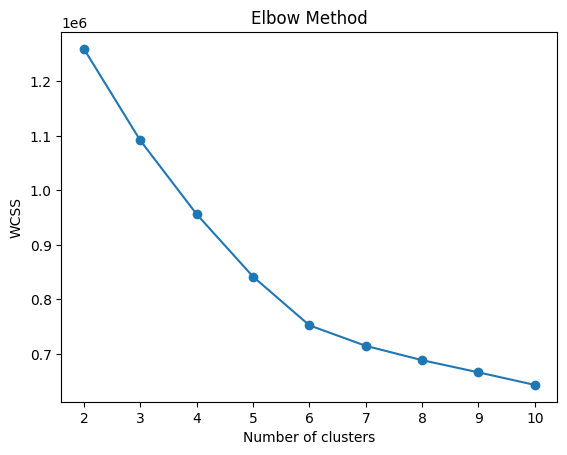

In [ ]:
#optimal k
#elbow
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
wcss = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the graph, the rate of decline begins to slow down after six clusters. There is a very distinct angle change at the position of six. Therefore, we consider six clusters to be an appropriate number of clusters.

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = list(range(2, 11))
average_silhouette_scores = []

for n_clusters in range_n_clusters:
    mbkmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=10, batch_size=100000)
    cluster_labels = mbkmeans.fit_predict(X_processed)

    silhouette_avg = silhouette_score(X_processed, cluster_labels, sample_size=20000)
    average_silhouette_scores.append(silhouette_avg)

    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is : 0.2316082855624962


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is : 0.220255720219991


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is : 0.1927570091011025


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is : 0.20599708815168674


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is : 0.21148459903612607


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is : 0.20438751772418992


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette_score is : 0.18669200842384492


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette_score is : 0.15985348763738727


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the average silhouette_score is : 0.15420749075778634


For 2 clusters, the average silhouette score is 0.23160. For 3 clusters, the average silhouette score is 0.22025. For 6 clusters, the average silhouette score is 0.21148. Keeping both the elbow method and silhouette scores in consderation, we choose 6 as the optimal number of clusters.


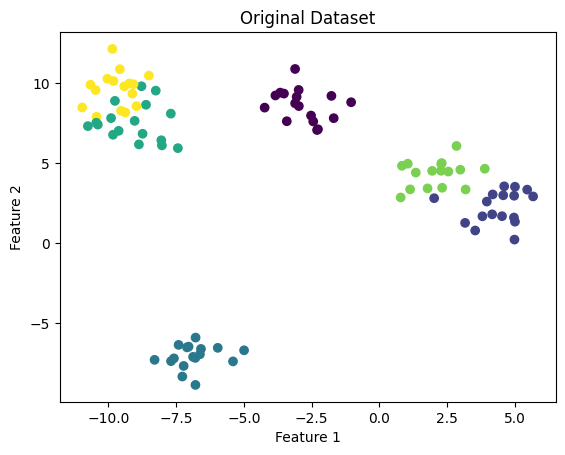

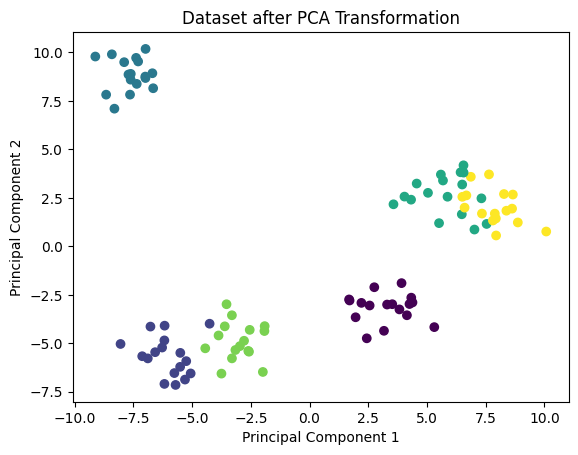

Explained variance ratio: [0.5700923 0.4299077]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=6, n_features=2, random_state=42)
#original dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Original Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
#dataset after PCA transformation
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("Dataset after PCA Transformation")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)

This indicates that PC1 explains approximately 57.01% of the variance in the data, and the PC2 explains about 42.99%. The contributions of these two components to the total variance are more balanced, which means that both principal components are important for capturing the structure of the data.

#Code note

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_processed)

n_components = X_scaled.shape[1] - 1
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X_scaled)

print(svd.explained_variance_ratio_)
print(sum(svd.explained_variance_ratio_))

NameError: name 'X_processed' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_processed)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_processed)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [ ]:
#silhouette scores
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_processed)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

KeyboardInterrupt: 

In [ ]:
#dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')
plt.show()

In [ ]:
#hierarchical clustering
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

Z = linkage(X, 'ward')

k = 2
h_clusters = fcluster(Z, k, criterion='maxclust')

silhouette_h = silhouette_score(X, h_clusters)
print("Silhouette Score:", silhouette_h)

In [ ]:
df_h = df.copy()
df_h['cluster'] = h_clusters

pd.crosstab(df_h['cluster'], df_h['###'])

In [ ]:
sns.countplot(x='cluster', hue='###', data=df_h)
plt.title('Cluster distribution by ###')
plt.show()

In [ ]:
#k-means clustering
k_clusters = KMeans(n_clusters=k, init = 'k-means++', random_state=42).fit(X)

silhouette_k = silhouette_score(X, k_clusters.labels_)
print("Silhouette Score:", silhouette_k)

In [ ]:
df_k = df.copy()
df_k['cluster'] = k_clusters.labels_

In [ ]:
df_k['cluster'].value_counts()

In [ ]:
sns.countplot(x='cluster', hue='###', data=df_k)
plt.title('Cluster distribution by ###')
plt.show()

In [ ]:
#note to coding
numeric_features = ['product_id', 'aisle_id', 'department_id', 'order_id', 'add_to_cart_order', 'reordered', 'user_id ', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
categorical_features = ['product_name', 'aisle', 'department']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('kmeans', kmeans)])

pipeline.fit(df_selected)

In [ ]:
#note continue from above cell
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

selected_features = ['product_id', 'aisle_id', 'department_id', 'order_id', 'add_to_cart_order', 'reordered', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
df_selected = df[selected_features].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)


inertia = []
silhouette_scores = []

k_values = range(2, 11)
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_data)
  inertia.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(X_processed)

cluster_labels = kmeans.labels_

df['Cluster_Label'] = cluster_labels